In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
#from  sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder

In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\train_NIR5Yl1.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\test_8i3B3FC.csv")

In [3]:
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
"""
dummies = pd.get_dummies(df[col],prefix=col)
df = pd.concat([df,dummies],axis=1)

#drop the encoded column
df.drop([col],axis = 1 , inplace=True)



Full function for this work:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    
    
"""
labelencoder_X = LabelEncoder()

df1['Tag'] = labelencoder_X.fit_transform(df1['Tag'])

"""
bn = Binarizer(threshold=7)
pd_watched = bn.transform([df1['Answers']])[0]
df1['pd_watched'] = pd_watched
"""



target=df1["Upvotes"]

df1 = df1.drop(["ID","Username"],axis = 1)

In [5]:
df1.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


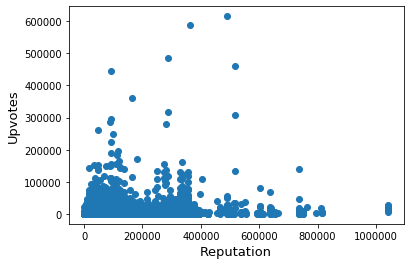

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Reputation'], y = df1['Upvotes'])
plt.ylabel('Upvotes', fontsize=13)
plt.xlabel('Reputation', fontsize=13)
plt.show()

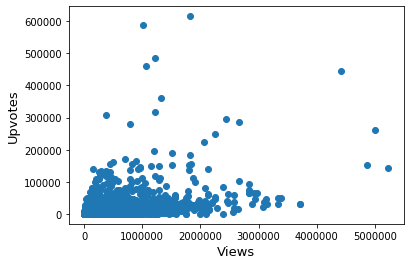

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Views'], y = df1['Upvotes'])
plt.ylabel('Upvotes', fontsize=13)
plt.xlabel('Views', fontsize=13)
plt.show()

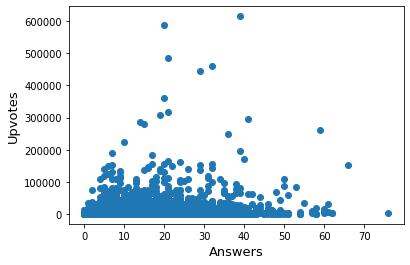

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Answers'], y = df1['Upvotes'])
plt.ylabel('Upvotes', fontsize=13)
plt.xlabel('Answers', fontsize=13)
plt.show()

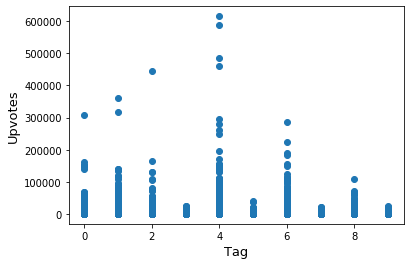

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Tag'], y = df1['Upvotes'])
plt.ylabel('Upvotes', fontsize=13)
plt.xlabel('Tag', fontsize=13)
plt.show()

In [10]:
#Skewness Checking for the Input Variables

from scipy import stats
from scipy.stats import norm, skew #for some statistics

numeric_feats = df1.dtypes[df1.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df1[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Upvotes,74.249352
Views,14.370639
Reputation,11.229976
Answers,3.380153
Tag,0.337229



 mu = 337.51 and sigma = 3592.44



C:\Users\SaurabhM\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\SaurabhM\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2445: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\SaurabhM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\SaurabhM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\SaurabhM\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


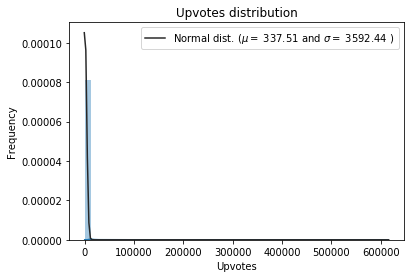

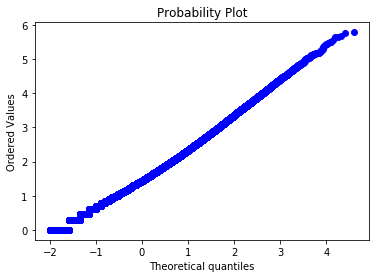

In [11]:
#Skewness and distribution checking for the input data
sns.distplot(df1['Upvotes'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['Upvotes'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Upvotes distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log10(df1['Upvotes']), plot=plt)
plt.show()

In [12]:
df1["Upvotes2"]=0


In [13]:
#df1["Upvotes2"]=np.log10(df1[df1["Upvotes"]>0]["Upvotes"]) 
df1["Upvotes2"]=np.log1p(df1["Upvotes"])

In [14]:
#df1['Upvotes2'] = df1['Upvotes2'].fillna(0)

In [15]:
df1.head(10)

,Tag,Reputation,Answers,Views,Upvotes,Upvotes2
0,0,3942.0,2.0,7855.0,42.0,3.761200
1,0,26046.0,12.0,55801.0,1175.0,7.069874
2,1,1358.0,4.0,8067.0,60.0,4.110874
3,0,264.0,3.0,27064.0,9.0,2.302585
4,1,4271.0,4.0,13986.0,83.0,4.430817
5,7,440.0,1.0,5577.0,4.0,1.609438
6,1,147.0,1.0,17184.0,17.0,2.890372
7,4,2269.0,2.0,312.0,3.0,1.386294
8,4,111.0,2.0,53738.0,79.0,4.382027
9,1,2749.0,1.0,227.0,0.0,0.000000


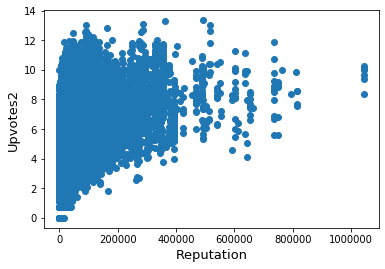

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Reputation'], y = df1['Upvotes2'])
plt.ylabel('Upvotes2', fontsize=13)
plt.xlabel('Reputation', fontsize=13)
plt.show()

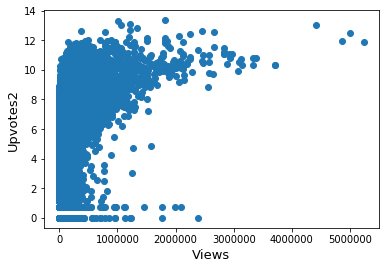

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Views'], y = df1['Upvotes2'])
plt.ylabel('Upvotes2', fontsize=13)
plt.xlabel('Views', fontsize=13)
plt.show()

In [18]:
df3=df1
df1=df1.drop(["Upvotes"],axis=1)
#df1=df1[df1["Views"]<3000000]
#df1=df1[df1["Reputation"]<800000]
df1.head()

,Tag,Reputation,Answers,Views,Upvotes2
0,0,3942.0,2.0,7855.0,3.761200
1,0,26046.0,12.0,55801.0,7.069874
2,1,1358.0,4.0,8067.0,4.110874
3,0,264.0,3.0,27064.0,2.302585
4,1,4271.0,4.0,13986.0,4.430817


In [19]:
df1.describe()

,Tag,Reputation,Answers,Views,Upvotes2
count,330045.00000,3.300450e+05,330045.000000,3.300450e+05,330045.000000
mean,3.54305,7.773147e+03,3.917672,2.964507e+04,3.540664
std,2.49392,2.706141e+04,3.579515,8.095646e+04,1.843141
min,0.00000,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,1.00000,2.820000e+02,2.000000,2.594000e+03,2.197225
50%,4.00000,1.236000e+03,3.000000,8.954000e+03,3.367296
75%,6.00000,5.118000e+03,5.000000,2.687000e+04,4.682131
max,9.00000,1.042428e+06,76.000000,5.231058e+06,13.329831


In [20]:
target=df1["Upvotes2"]
df1=df1.drop(["Upvotes2"],axis=1)

In [21]:
#Splitting the data for training and testing
X_train,X_test,y_train,y_test=ms.train_test_split(df1,target,test_size=0.22,random_state=42)
#Standard Scaling to bring the data to mean zero 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [22]:
#Ransac  Regression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

-11.704134397485609
6.56638523579235


In [23]:
#Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.40698399560721
1.418688425987267


In [24]:
#Lasso Regression
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

-1.8687178238163682e-06
1.8422740057036235


In [25]:
#ElasticSearch
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.18125806255133314
1.6669682828948087


In [26]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 5,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.009,max_iter=200)
lin_reg_1.fit(X_poly, y_train)
# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))


mse = sklearn.metrics.mean_squared_error(y_test, pred_val)
rmse = math.sqrt(mse)
print(rmse)

-1.8687178238163682e-06
1.8422740057036235


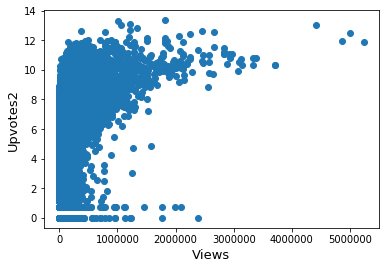

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = df3['Views'], y = df3['Upvotes2'])
plt.ylabel('Upvotes2', fontsize=13)
plt.xlabel('Views', fontsize=13)
plt.show()

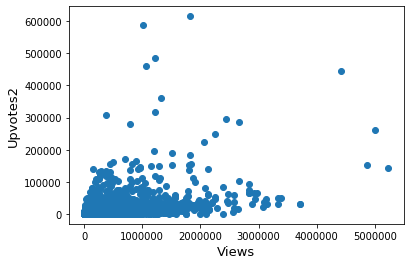

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = df3['Views'], y = np.expm1(df3['Upvotes2']))
plt.ylabel('Upvotes2', fontsize=13)
plt.xlabel('Views', fontsize=13)
plt.show()


 mu = 152.98 and sigma = 402.01



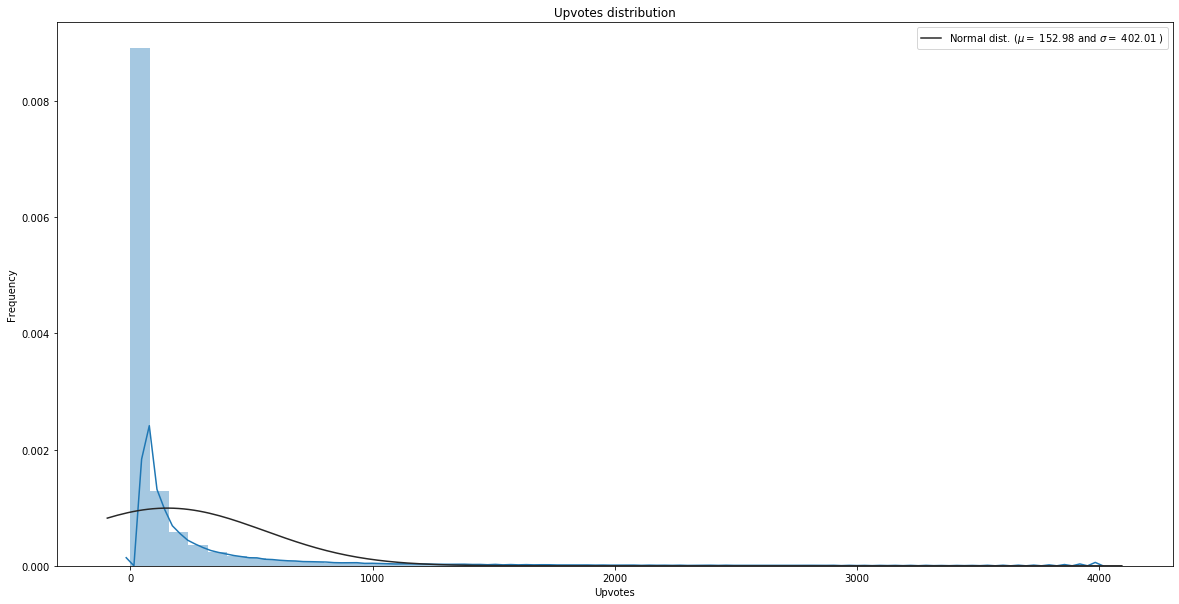

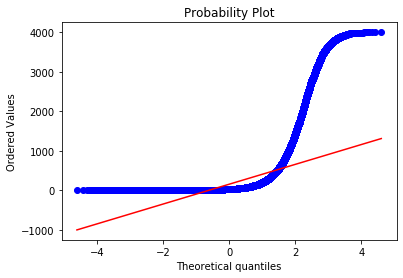

In [38]:
#Skewness and distribution checking for the input data
df4=df3[df3["Upvotes"]<4000]
fig = plt.figure(figsize=(20,10))

sns.distplot(df4['Upvotes'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df4['Upvotes'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Upvotes distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df4['Upvotes'], plot=plt)
plt.show()


 mu = 3.54 and sigma = 1.84



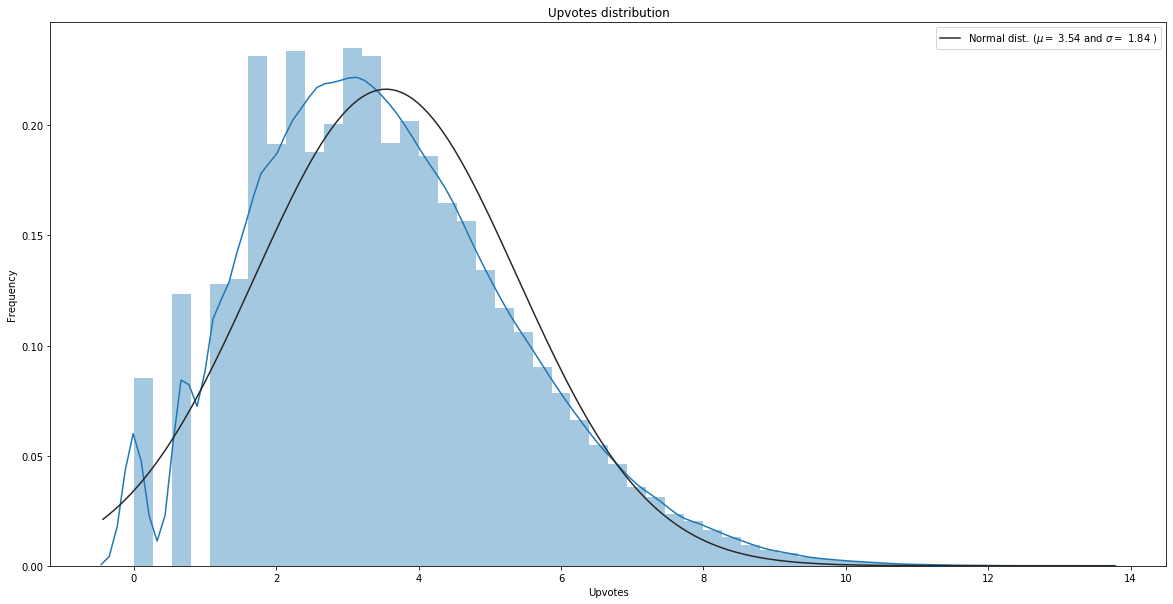

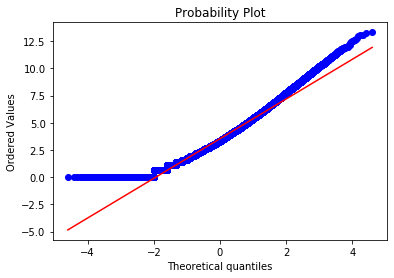

In [40]:
 #Skewness and distribution checking for the input data
df4=df3
fig = plt.figure(figsize=(20,10))
df4["Upvotes"]=np.log1p(df3["Upvotes"])

sns.distplot(df4['Upvotes'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df4['Upvotes'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Upvotes distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df4['Upvotes'], plot=plt)
plt.show()

In [44]:
target=np.log1p(target)

In [45]:
target.head()

0    1.560500
1    2.088138
2    1.631370
3    1.194706
4    1.692090
Name: Upvotes2, dtype: float64

In [47]:
target.shape

(330045,)

In [49]:
df1.shape

(330045, 4)

In [50]:
#Splitting the data for training and testing
X_train,X_test,y_train,y_test=ms.train_test_split(df1,target,test_size=0.22,random_state=42)
#Standard Scaling to bring the data to mean zero 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [51]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 5,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.009,max_iter=200)
lin_reg_1.fit(X_poly, y_train)
# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))


mse = sklearn.metrics.mean_squared_error(y_test, pred_val)
rmse = math.sqrt(mse)
print(rmse)

-9.329923975398557e-06
0.44762839687647765


In [52]:
#Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.27171198074241354
0.3820033632648564
